# Cleaning the data and visualizing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_test_wo_survival = pd.read_csv('../data/test.csv')
df_train = pd.read_csv('../data/train.csv')
df_test_data_merge = pd.read_csv('../data/gender_submission.csv')

In [4]:
df_test_wo_survival.head()  # below test data missing survival dependent variable, so we merge later this column from df_test_data_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.head() # training data with all the necessary variables

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test_data_merge.head()  # this dataframe has to be merged with test dataframe to make it match with train dataset

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
df_test = pd.concat([df_test_data_merge, df_test_wo_survival], axis=1)

In [8]:
df_test.head() # dataframe has 2 passengerId colums

,PassengerId,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_test = df_test.T.drop_duplicates().T # removes the duplicate column
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [10]:
# drop_duplicate method unfortunately makes all the column types to object which makes hard to visualise the data
# solution is to manually give the datatypes for each column
df_test['PassengerId'] = pd.to_numeric(df_test['PassengerId'], errors='coerce')
df_test['Survived'] = pd.to_numeric(df_test['Survived'], errors='coerce')
df_test['Pclass'] = pd.to_numeric(df_test['Pclass'], errors='coerce')
df_test['Age'] = pd.to_numeric(df_test['Age'], errors='coerce')
df_test['SibSp'] = pd.to_numeric(df_test['SibSp'], errors='coerce')
df_test['Parch'] = pd.to_numeric(df_test['Parch'], errors='coerce')
df_test['Fare'] = pd.to_numeric(df_test['Fare'], errors='coerce')

# merging both test and train data into a single dataframe
reason: this whole dataset can be easily more custom split by sklearn libraries

In [11]:
df = pd.concat([df_train, df_test], axis=0) # now df contains both test and train dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# normalising all column names to lower letters
df_column_names = [i.lower() for i in df.columns]
df.columns = df_column_names
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# Analysing Data

* It is better not to have empty values in a dataset before feeding it into a machine learning algorithm

In [13]:
# we can use heatmap to find the empty values in a dataset
df.isnull().head() # 'isnull' returns true for a datapoint if it is null, we can plot heatmap on this dataset to visualise

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


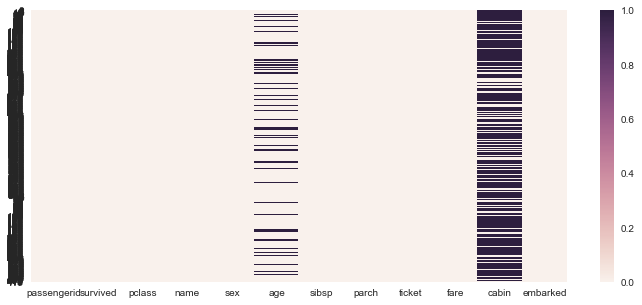

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull())
#  below map shows the null values are in AGE and CABIN Column

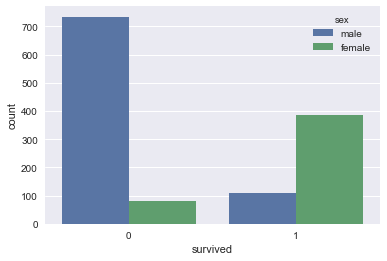

In [15]:
sns.countplot(data=df, x='survived', hue='sex')
# below plot shows that female survival is more than the male survival

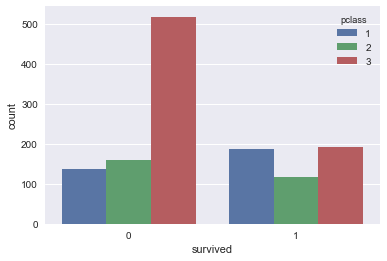

In [16]:
sns.countplot(data=df, x='survived', hue='pclass')
# below plot concludes that 3rd class passengers survival rate is very low

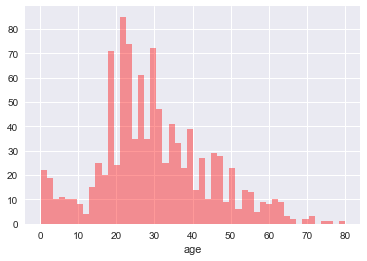

In [17]:
sns.distplot(df['age'].dropna(), kde=False, bins=50, color='red')

In [18]:
# we check the dataframe and remove the unnecassry columns from it which will not be useful for our machine learning algorithms
df.drop(['cabin', 'ticket', 'name', 'passengerid'], inplace=True, axis=1)

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


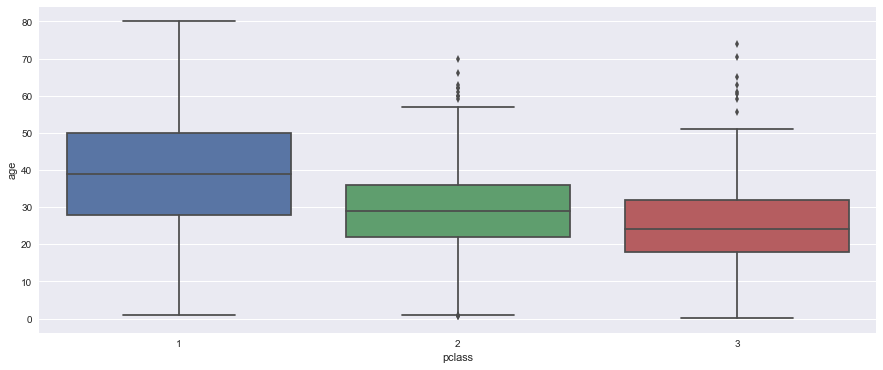

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='pclass', y='age')
# below boxplot shows the median of age for every class of passengers
# we can use this logic to update the empty age values in our dataset
# below boxplot results that the 
# -----passengers who travel in 1st class have 39 median age approx
# -----passengers who travel in 2nd class have 28 median age approx
# -----passengers who travel in 3rd class have 23 median age approx

In [21]:
# with the above study we fill the empty age data points by using the method below
for index, row in df.iterrows():
    if row['pclass'] == 1 and np.isnan(row['age']):
        df.set_value(index, 'age', 39)
    elif row['pclass'] == 2 and np.isnan(row['age']):
        df.set_value(index, 'age', 28)
    elif row['pclass'] == 3 and np.isnan(row['age']):
        df.set_value(index, 'age', 23)

In [22]:
# we now have to convert the categorical columns into continuos values
# for example sex column is of string 'male' or 'female' and we have to change it to continuos data or categorical data 0 and 1's
pd.get_dummies(df['sex']).head()
# get_dummies takes a column and converts as below

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
# now we cut one of the columns because of non-invertibility (collinearity)
# this means predicting with male and female columns as variables are the same as predicting with onle male column. 
# they both are dependent -- so we remove one of the columns by using
male = pd.get_dummies(df['sex'], drop_first=True)
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
# the next categorical column in our data frame is embarked. we do the same for this column
embarked = pd.get_dummies(df['embarked'], drop_first=True)

In [25]:
# now we drop the 'no meaning' sex and embarked columns from the dataframe and insert the male and embarked columns into df
df.drop(['sex', 'embarked'], inplace=True, axis=1)
titanic_df = pd.concat([df, male, embarked], axis=1)

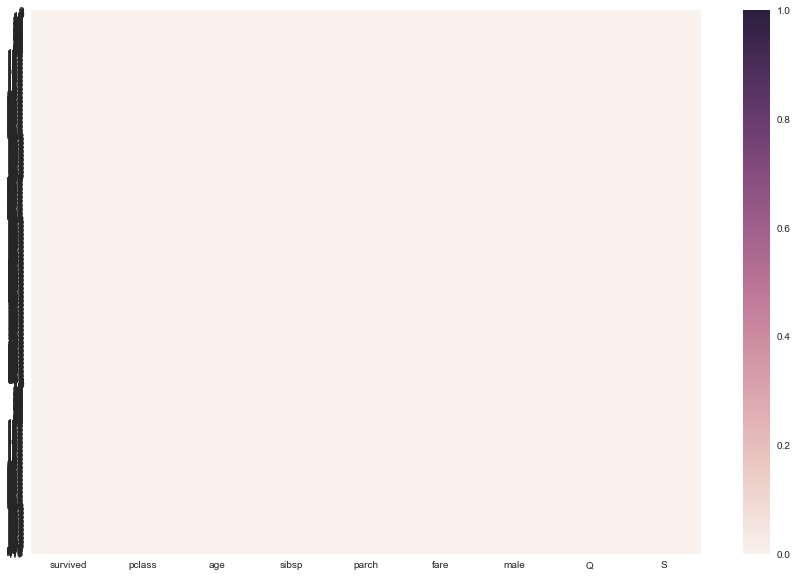

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df.isnull())
# below is a meaningful, cleaned dataset with no null values, to feed into machine learning algorithms

In [27]:
for index, row in titanic_df.iterrows():
    if pd.isnull(row['fare']):
        print(row['fare'], index, row['age'], row['parch'])

        # solve this issue ------------------
        # shows that 152 nd row, fare column is null
        # but this null is not shown in the above heatmap

nan 152 60.5 0.0


In [28]:
titanic_df.iloc[152] # below ouput shows that 152nd fare is not null (found this when log regression model 
# throwed error on the cleaned data)

survived     0.00
pclass       3.00
age         55.50
sibsp        0.00
parch        0.00
fare         8.05
male         1.00
Q            0.00
S            1.00
Name: 152, dtype: float64

In [29]:
# temporary fix ------- dropping that null containing row
titanic_df.dropna(inplace=True)

In [30]:
# now the cleaned data to be fed into the machine learning models looks like
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# LOGISTIC REGRESSION

## building regression model using scikit learn

In [31]:
# we have default data splitter model in sklearn which is easy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop(['survived'],axis=1), titanic_df['survived'], test_size=0.30)
# above test size parameter is the percentage of split 
# first parameter is x - independent variables
# second parameter is y - dependent variable

In [32]:
# logistic regression model has to be initialised
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
# fit the model with our data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# predicting the data
predictions = logreg.predict(X_test)

## Evaluating the model

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88       237
          1       0.84      0.76      0.80       156

avg / total       0.85      0.85      0.85       393



Above model has 86% precision, this can be improved by 

TODO's  : 1. get value from 'name' column. differentiate with mr,mrs and dr (feature engineering)
            2. think if we can get any meaning from the deleted ticket and cabin column

In [73]:
def gradient_descent(x, y, alpha, theta, m, iterations):
    '''
    # x - independent variables in matrix format with 1's as first column
    # y - dependent variables as COLUMN vector
    # m - number of training examples
    # alpha - steps for gradient descent
    '''
    for i in range(iterations):
        '''
        give theta as a COLUMN vector. 
        TODO: check if theta is a row or column vector and make sure it is converted to column at the end
        TODO: make sure x has default 1's as the first column for the intercepts
        '''
        hypothesis = np.dot(x, theta)
        sigmoid_hypothesis = 1/(1+np.exp(-hypothesis))
        error = sigmoid_hypothesis - y
        gradient = np.dot(x.T, error)/m
        theta = theta - alpha*gradient
    return theta

In [76]:
m,n = np.shape(X_train)
x = np.c_[np.ones(m), X_train]
X_train

,pclass,age,sibsp,parch,fare,male,Q,S
398,3,22.00,0,0,7.7750,1,0,1
52,2,20.00,2,1,23.0000,0,0,1
313,3,37.00,0,0,7.7500,0,1,0
35,3,18.50,0,0,7.2292,1,0,0
558,1,39.00,1,1,79.6500,0,0,1
704,3,26.00,1,0,7.8542,1,0,1
496,1,54.00,1,0,78.2667,0,0,0
327,2,36.00,0,0,13.0000,0,0,1
191,2,39.00,0,0,13.0000,1,0,1
62,3,18.00,0,0,7.7500,1,0,1


In [79]:
gradient_descent(x, np.array(y_train).reshape(-1,1), 0.0005, np.ones(9).reshape(-1,1), 915, 1000000)
#  write functions to calculate the survival on x_test data and comare with y_test for accuracy
#  below is a normal linear model of the form ---- transpose(theta) * x
#  in the below result, first term is intercept value, then goes in the order pclass, age, sibsp, parch, fare, male, q, s

array([[ 3.96788042],
       [-0.75628977],
       [-0.02055317],
       [-0.30556321],
       [-0.02998617],
       [ 0.00408961],
       [-3.62698151],
       [ 0.12127679],
       [-0.1064931 ]])

In [80]:
X_test #  test with the below values. values over 1, check for the mistake

,pclass,age,sibsp,parch,fare,male,Q,S
47,3,23.0,0,0,7.7500,0,1,0
438,1,64.0,1,4,263.0000,1,0,1
403,3,28.0,1,0,15.8500,1,0,1
505,1,18.0,1,0,108.9000,1,0,0
759,1,33.0,0,0,86.5000,0,0,1
622,3,20.0,1,1,15.7417,1,0,0
144,2,18.0,0,0,11.5000,1,0,1
343,1,58.0,0,1,512.3292,0,0,0
150,1,23.0,0,1,83.1583,0,0,0
575,3,19.0,0,0,14.5000,1,0,1
